In [18]:
# 格子サイズの選択
lattice_size = 16
# 隠れ層のユニット数の選択
hidden_size = 3

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [20]:
hidden_size = 3

In [21]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [22]:
prm_data_path = f'data/prm_data_L{lattice_size}_FCN_Nh{hidden_size}.pth'

In [23]:
prm = torch.load(prm_data_path, map_location=torch.device('cpu'))
prm

OrderedDict([('fc1.weight',
              tensor([[-1.9147e-03, -2.6889e-02, -4.4751e-02,  8.6040e-02, -4.7933e-02,
                       -8.0631e-03, -6.3282e-03,  3.4946e-02, -2.3190e-02, -5.1960e-02,
                        3.1974e-02,  1.6653e-02, -2.7212e-02,  4.4704e-02,  5.8446e-03,
                       -2.7565e-02,  8.2728e-02, -4.1941e-04,  2.2937e-02,  4.9399e-02,
                        3.8699e-02, -4.2597e-02, -3.5456e-02,  1.5717e-02,  3.7085e-02,
                        3.5662e-02, -2.2008e-02,  4.1418e-03,  6.0670e-02,  2.2261e-02,
                       -1.7933e-02,  3.9603e-02,  1.6543e-02, -2.3579e-02, -1.4394e-02,
                        6.8114e-04, -2.9423e-02,  1.4557e-02,  8.1995e-02, -4.4585e-02,
                        2.7418e-02, -6.6206e-02,  2.5886e-03,  3.6491e-02,  1.0907e-02,
                       -5.4881e-02, -1.5548e-02, -5.7015e-02,  1.1119e-02, -5.4411e-03,
                        4.6351e-02,  4.9401e-02, -3.7137e-02,  1.1834e-02, -4.1605e-03,
    

In [24]:
fc2_weight = prm['fc2.weight']
fc2_weight

tensor([[  3.2481, -36.7074, -36.0473],
        [  3.1682, -35.9805, -36.8509],
        [  2.8839, -35.3566, -35.5421],
        [  3.4573, -33.5709, -34.1038],
        [  3.2624, -32.3636, -34.0528],
        [  2.8119, -27.2955, -31.5086],
        [  2.9842, -19.3703, -19.8389],
        [  2.7680,  -9.1234,  -9.4551],
        [  1.8962,  -2.4606,  -2.7313],
        [ -0.3831,  -0.3594,  -0.4768],
        [ -3.8329,   0.4257,   0.4710],
        [ -7.8571,   1.0653,   1.1760],
        [-11.0945,   1.6287,   1.7116],
        [-13.1829,   2.2177,   2.3656],
        [-14.8966,   2.2272,   2.2457],
        [-16.0126,   2.1648,   2.3994],
        [-16.6592,   2.0799,   2.2032],
        [-16.9765,   2.2704,   2.3476],
        [-16.7688,   2.6510,   2.7531],
        [-17.2332,   2.4160,   2.5433]])

In [25]:
fc2_weight.size()

torch.Size([20, 3])

In [26]:
# NumPy配列に変換
fc2_weight_np = fc2_weight.cpu().numpy()
# データを転置して
fc2_weight_np_square = fc2_weight_np.T

In [27]:
fc2_weight_np_square

array([[  3.2480583 ,   3.1682239 ,   2.8838522 ,   3.4572778 ,
          3.262396  ,   2.811856  ,   2.984245  ,   2.7679908 ,
          1.8962076 ,  -0.38308182,  -3.8328907 ,  -7.8571386 ,
        -11.094472  , -13.182892  , -14.89664   , -16.01263   ,
        -16.659235  , -16.9765    , -16.768833  , -17.233152  ],
       [-36.70735   , -35.980537  , -35.356594  , -33.570854  ,
        -32.363598  , -27.295523  , -19.370275  ,  -9.123443  ,
         -2.4606376 ,  -0.3593651 ,   0.42572582,   1.0653305 ,
          1.628719  ,   2.2177212 ,   2.2271976 ,   2.164824  ,
          2.0798595 ,   2.2704146 ,   2.6509705 ,   2.416027  ],
       [-36.047276  , -36.850853  , -35.5421    , -34.103798  ,
        -34.052776  , -31.508575  , -19.838932  ,  -9.455122  ,
         -2.731338  ,  -0.4768335 ,   0.47098008,   1.17595   ,
          1.7116126 ,   2.3655834 ,   2.245657  ,   2.399364  ,
          2.2031639 ,   2.3476448 ,   2.753055  ,   2.5433314 ]],
      dtype=float32)

In [28]:
fc2_weight_np_square.shape

(3, 20)

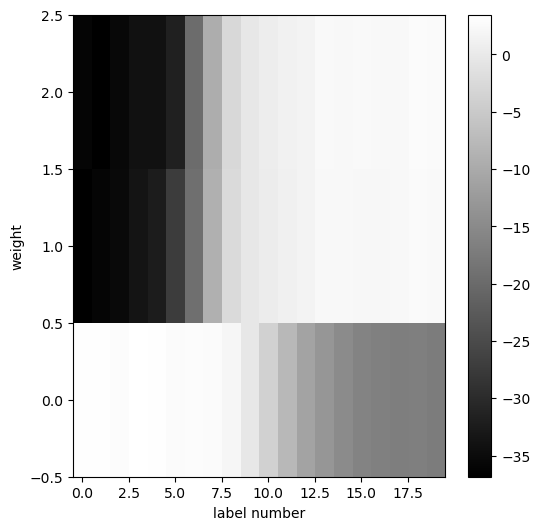

In [63]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc2_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
# plt.title('Heatmap (L16 FCNN Nh3)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig(f'image/L16_FCN_Nh{hidden_size}_wight.png')
plt.show()

In [30]:
fc2_weight_np_square_sum = np.sum(fc2_weight_np_square, axis=0)
fc2_weight_np_square_sum

array([-69.50657  , -69.66316  , -68.01484  , -64.21738  , -63.153976 ,
       -55.99224  , -36.22496  , -15.810574 ,  -3.295768 ,  -1.2192804,
        -2.936185 ,  -5.615858 ,  -7.75414  ,  -8.599587 , -10.423785 ,
       -11.448442 , -12.376211 , -12.35844  , -11.364807 , -12.273794 ],
      dtype=float32)

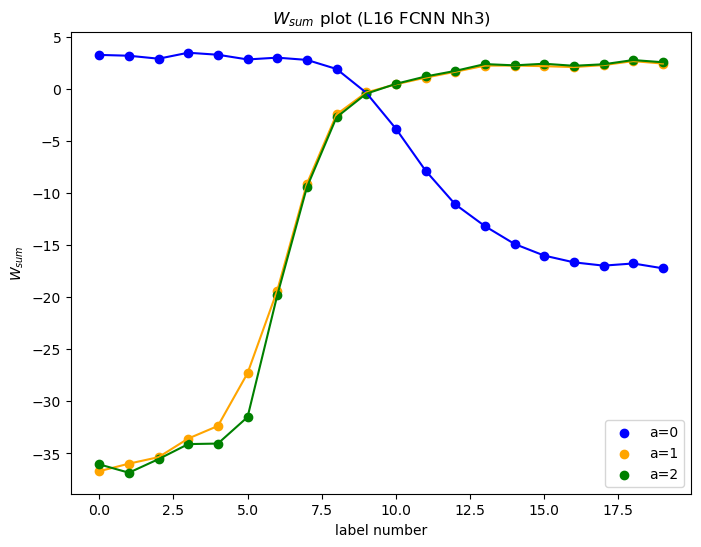

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# データ
x = np.arange(len(fc2_weight_np_square[1]))
y0 = fc2_weight_np_square[0]
y1 = fc2_weight_np_square[1]
y2 = fc2_weight_np_square[2]

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')
plt.plot(x, y0, color='blue')
plt.plot(x, y1, color='orange')
plt.plot(x, y2, color='green')
plt.title('$W_{sum}$ plot (L16 FCNN Nh3)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')
plt.legend()  # 凡例を表示

# 図をファイルとして保存
plt.savefig(f'image/L16_FCN_Nh{hidden_size}_weight_plot.png')
plt.show()

第1層の出力と磁化の相関図を作成

In [32]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [33]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [34]:
# ファイルの相対パスを指定
file_path = f'data/Ising_data_L{lattice_size}_v3.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [35]:
# # 磁化を計算
# def magnetization(state):
#     return np.mean(state)

# for i in range(len(spin_data)):
#     mag = magnetization(spin_data[i])
#     if mag > 0:
#         spin_data[i] *= -1

In [36]:
spin_data[0].shape

(16, 16)

In [37]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]
flat_spin_data[0].shape

(256,)

In [38]:
fc1_weight = prm['fc1.weight'].cpu().numpy()
len(fc1_weight)


3

In [39]:
fc1_bias = prm['fc1.bias'].cpu().numpy()
fc1_bias

array([ 5.183513 , -4.2328362, -4.4147177], dtype=float32)

In [40]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [41]:
len(output_data_0)

40000

In [42]:
len(mag_data)

40000

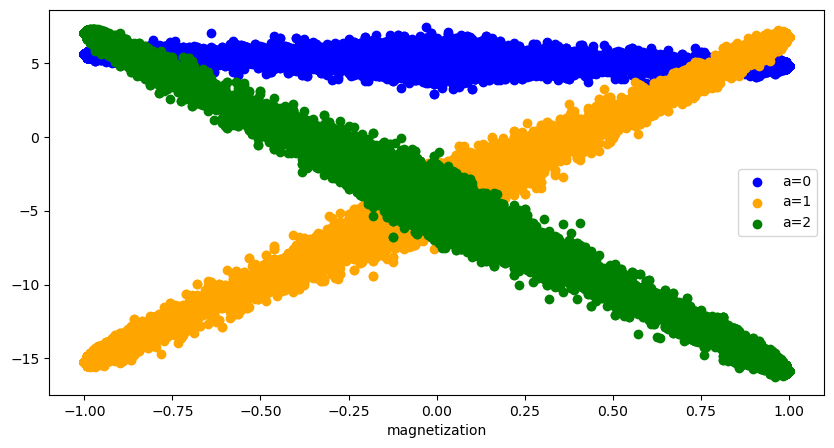

In [66]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


# plt.title('Output of first layer')
plt.xlabel('magnetization')
plt.legend()  # 凡例を表示

# 図をファイルとして保存
plt.savefig(f'image/L{lattice_size}_FCN_Nh{hidden_size}_output.png')
plt.show()

学習済みモデルからプロットするver

In [44]:
import torch.nn as nn
import torch.nn.functional as F

class FCNN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=True)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        return x

In [45]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [46]:
input_size = 16*16
hidden_size = 3
output_size = 20
model = FCNN2(input_size, hidden_size, output_size).to(device)

model.load_state_dict(torch.load(prm_data_path), strict=False)
print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[-1.9147e-03, -2.6889e-02, -4.4751e-02,  8.6040e-02, -4.7933e-02,
         -8.0631e-03, -6.3282e-03,  3.4946e-02, -2.3190e-02, -5.1960e-02,
          3.1974e-02,  1.6653e-02, -2.7212e-02,  4.4704e-02,  5.8446e-03,
         -2.7565e-02,  8.2728e-02, -4.1941e-04,  2.2937e-02,  4.9399e-02,
          3.8699e-02, -4.2597e-02, -3.5456e-02,  1.5717e-02,  3.7085e-02,
          3.5662e-02, -2.2008e-02,  4.1418e-03,  6.0670e-02,  2.2261e-02,
         -1.7933e-02,  3.9603e-02,  1.6543e-02, -2.3579e-02, -1.4394e-02,
          6.8114e-04, -2.9423e-02,  1.4557e-02,  8.1995e-02, -4.4585e-02,
          2.7418e-02, -6.6206e-02,  2.5886e-03,  3.6491e-02,  1.0907e-02,
         -5.4881e-02, -1.5548e-02, -5.7015e-02,  1.1119e-02, -5.4411e-03,
          4.6351e-02,  4.9401e-02, -3.7137e-02,  1.1834e-02, -4.1605e-03,
         -8.5949e-02,  1.9509e-02, -4.8339e-02,  3.6991e-04, -4.8016e-02,
          6.9411e-04, -3.2056e-02,  2.7977e-02, -1.6381e-02, -5.2554e-03,
         -

In [47]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [50]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)
        
# ファイルの相対パスを指定
file_path = f'data/Ising_data_L{lattice_size}_v3.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [51]:
# NumPy ndarrayをPyTorch Tensorに変換
spin_data_tensor = [torch.from_numpy(i).type(torch.float32) for i in spin_data]
spin_data_tensor[0].size()

torch.Size([16, 16])

In [52]:
output = [np.squeeze(model(spin_data_tensor[i]).detach().numpy()) for i in range(len(spin_data_tensor))]

In [53]:
a = torch.squeeze(model(spin_data_tensor[1]))
b = [a[i].detach().numpy() for i in range(3)]
b[0]

array([-1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.], dtype=float32)

In [54]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]

In [55]:
fc0_weight = model.state_dict()['fc1.weight'].cpu().numpy()
fc0_bias = model.state_dict()['fc1.bias'].cpu().numpy()

In [56]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [57]:
output_data_0

[4.413315862359013,
 4.413315862359013,
 5.146334296907298,
 4.459136082732584,
 4.459136082732584,
 5.353291027713567,
 5.353291027713567,
 5.349275663262233,
 5.633347555063665,
 5.633347555063665,
 4.706990287755616,
 4.706990287755616,
 6.049794799939264,
 5.508467637002468,
 5.508467637002468,
 4.787811301473994,
 4.787811301473994,
 5.9035953884013,
 5.198513209237717,
 5.143163509492297,
 4.774597029958386,
 4.774597029958386,
 5.676437696965877,
 4.615165157360025,
 5.194133232173044,
 5.194133232173044,
 5.280788209114689,
 5.343615835008677,
 5.50568450812716,
 4.65337703039404,
 4.65337703039404,
 6.4998621746199206,
 4.768523599137552,
 5.9564469587639906,
 5.691715852939524,
 6.291256495460402,
 5.125439389899839,
 4.840064469433855,
 4.87943936267402,
 4.87943936267402,
 4.707290071120951,
 5.176232070371043,
 6.24644374899799,
 6.24644374899799,
 5.345992312009912,
 5.3193074177834205,
 5.3193074177834205,
 4.846961018280126,
 4.69610433204798,
 6.121076228155289,
 6.121

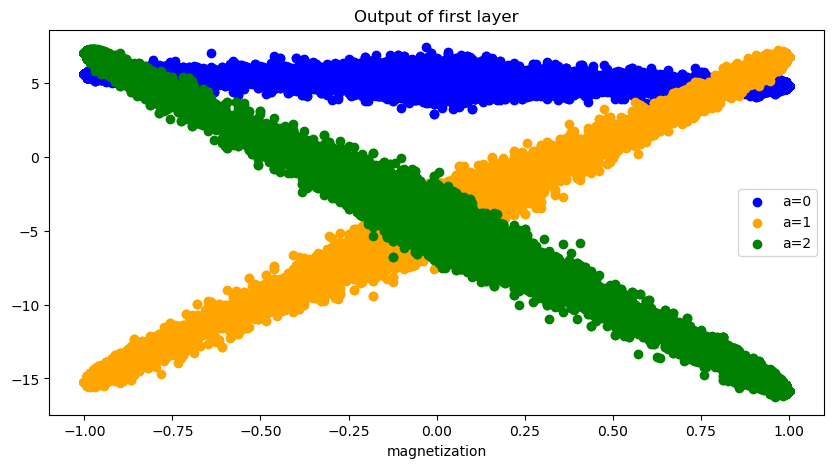

In [58]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
# plt.savefig('../image/L16_CNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()